In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data2 = pd.read_csv('ex1data2.txt', sep = ',', header = None)

In [3]:
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data2.columns = ['x0', 'x1', 'y']

In [5]:
data2['y'] = data2['y']/data2.y.max()*10

In [6]:
num_samples = data2.shape[0]
print (num_samples)

47


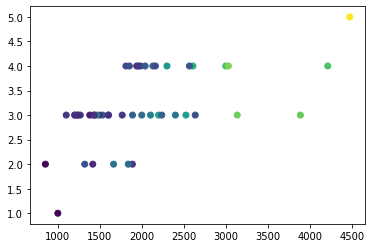

In [7]:
plt.scatter(data2['x0'], data2['x1'], c = data2['y'])

In [8]:
def predict(x, a, b):
    y = np.matmul(np.array(x),a)+b
    return y

In [9]:
def sum_squared_error(y, y_pred):
    sse = np.sum([error**2 for error in (y - y_pred)])
    return sse

In [10]:
def gradient_descent(x, y, a, b, learning_rate):
    y_pred = predict(x, a, b) 
    #print (a)
    #print (np.matmul((y_pred - y), np.array(x)))
    #print (learning_rate * np.matmul((y_pred - y), np.array(x)))
    a = a - learning_rate * np.matmul((y_pred - y), np.array(x)) / num_samples
    #print (a)
    b = b - learning_rate * np.sum(y_pred - y) / num_samples
    return a, b

In [11]:
y = data2.pop('y').values
x = data2.values
a = np.array([0.0]*data2.shape[1])
b = 1.0
learning_rate = 0.0000001
y_pred = predict(x, a, b)
sse = sum_squared_error(y, y_pred)

In [12]:
sse_list = []
sse_temp = 0
n_epoch = 20
for i in range(n_epoch):
    y_pred = predict(x, a, b)
    sse = sum_squared_error(y, y_pred)
    sse_list.append(sse)
    a, b = gradient_descent(x, y, a, b, learning_rate)
print (a, b)

[1.92997352e-03 2.70063795e-06] 1.0000008405121967


Text(0.5, 0, 'Epoch')

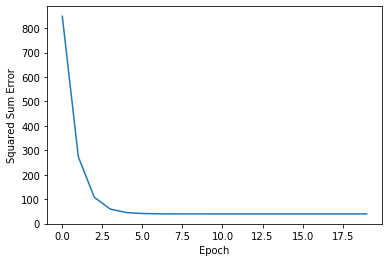

In [13]:
plt.plot(sse_list)
plt.ylabel('Squared Sum Error')
plt.xlabel('Epoch')

In [14]:
y_pred = predict(x, a, b)

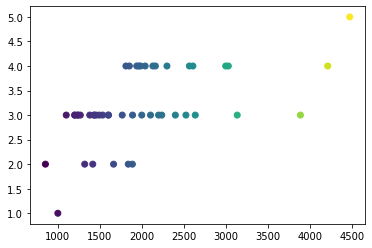

In [15]:
plt.scatter(data2['x0'], data2['x1'], c = y_pred)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
a

array([1.92997352e-03, 2.70063795e-06])

In [18]:
b

1.0000008405121967

In [19]:
coef = reg.coef_
coef

array([ 0.00198901, -0.12484668])

In [20]:
intercept = reg.intercept_
intercept

1.2801530153278673

In [21]:
y_pred1 = reg.predict(x)

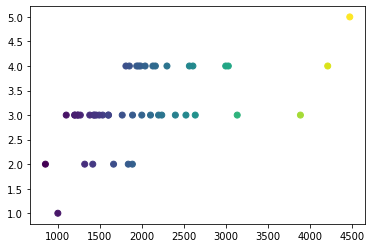

In [22]:
plt.scatter(data2['x0'], data2['x1'], c=y_pred1)

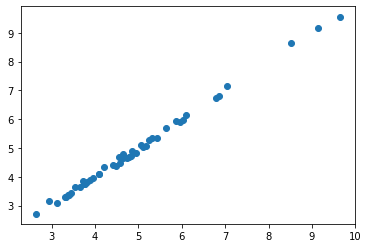

In [23]:
plt.scatter(y_pred, y_pred1)

In [24]:
y_pred-y_pred1

array([-2.98127106e-02, -5.93013308e-05, -4.72869351e-02, -1.14046326e-01,
        4.21417199e-02,  1.02061780e-01,  3.83697845e-03,  1.01536745e-02,
        1.29282980e-02,  6.19836014e-03,  1.04718335e-01, -2.36731182e-02,
       -1.71793186e-02,  7.97380469e-02,  1.95401667e-02,  8.34658995e-02,
       -1.08379010e-01,  2.14292720e-02,  6.52242259e-02,  4.03116491e-02,
       -9.91806988e-03, -1.41910630e-01, -2.95439500e-04,  1.03419575e-01,
       -1.35248403e-01,  2.94579698e-02,  8.32360366e-03, -5.47252874e-02,
       -3.54800267e-02, -6.12781216e-02, -1.39017937e-01, -2.14337337e-01,
        9.88148804e-02, -9.07953927e-02,  1.12333791e-01,  9.56332905e-03,
        2.12521684e-02,  9.33837026e-02, -2.95852489e-02,  9.16126663e-02,
       -1.28686892e-01, -3.77233393e-02,  6.77036767e-02,  2.35545156e-02,
       -8.07508441e-02,  1.09913374e-01,  2.33774119e-02])